In [172]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [187]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

YEAR = 19
CLUSTERS = range(8, 9)
MOTHERS = ['E', 'U']
FILTERS = {'vocalization': 1, 'year': 17}
RESULTS_FOLDER = "/home/utilisateur/Desktop/palomars/usv-experiments/full-dataset/results"
RESULTS_FOLDER = os.path.join(
    RESULTS_FOLDER,
    '_'.join([f"{k}:{v}" for k, v in FILTERS.items()]),
    'clustering',
    'cluster_assigns'
)
CSV_PATH = os.path.join(RESULTS_FOLDER, "mean_stft-ward-euclidean.csv")

In [188]:
for c in CLUSTERS:
    os.makedirs(os.path.join(RESULTS_FOLDER, 'counts', f'clust{c}'), exist_ok=True)

In [189]:
df = pd.read_csv(CSV_PATH)
df = df.assign(mother=df.mother.apply(lambda m: m[2]))

In [190]:
for c in CLUSTERS:
    for m in MOTHERS:
        tmp = df[['mother', 'postnatalday', f"clust{c}", "event"]]
        tmp = tmp[tmp.mother == m].drop('mother', axis=1)

        tmp = tmp.groupby(['postnatalday', f"clust{c}"]).count()
        tmp.rename({'event': 'counts', f"clust{c}": "cluster number"}, axis=1, inplace=True)
        tmp.to_csv(os.path.join(RESULTS_FOLDER, 'counts',  f'clust{c}', f'counts-mother:{m}_clust{c}.csv'), index=False)

In [191]:
tmp

counts
postnatalday clust8        
1            1           53
             2           32
             3            8
             4           37
             5            2
             6            3
5            2           23
             3           30
             4           36
             5           13
             6           18
             7            4
             8           14
9            2           81
             3            1
             4           11
             5            1
             6            5

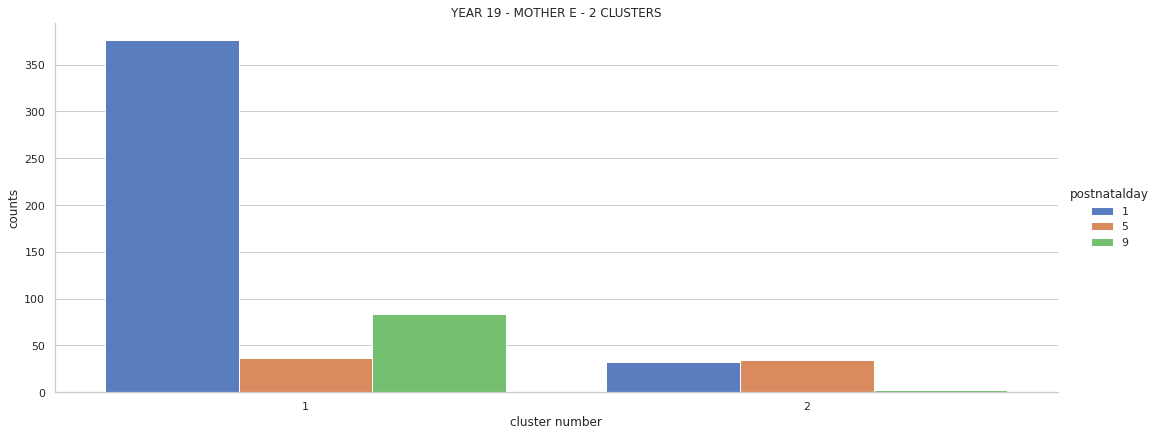

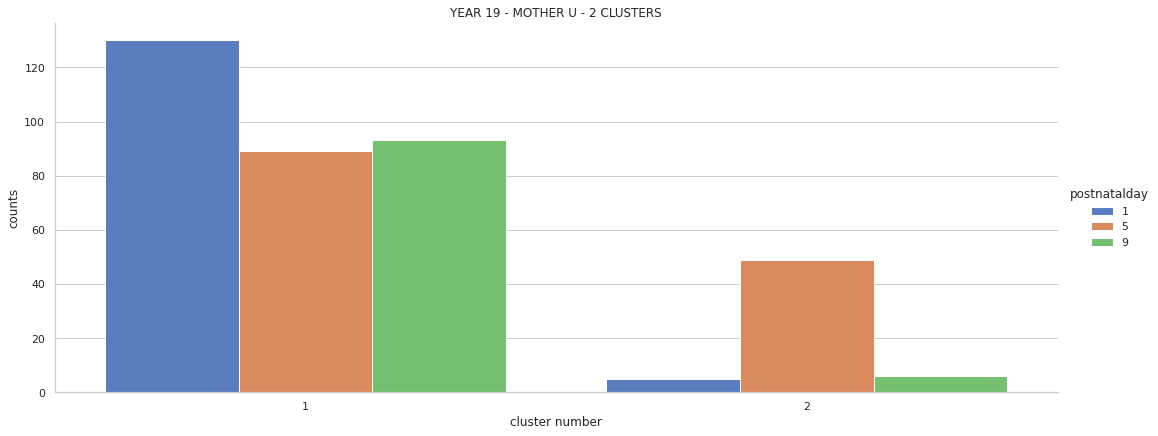

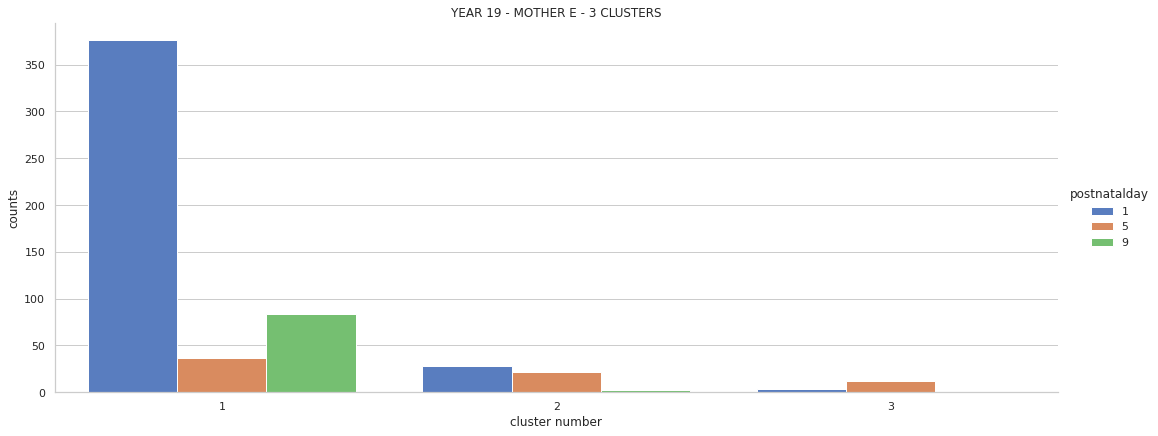

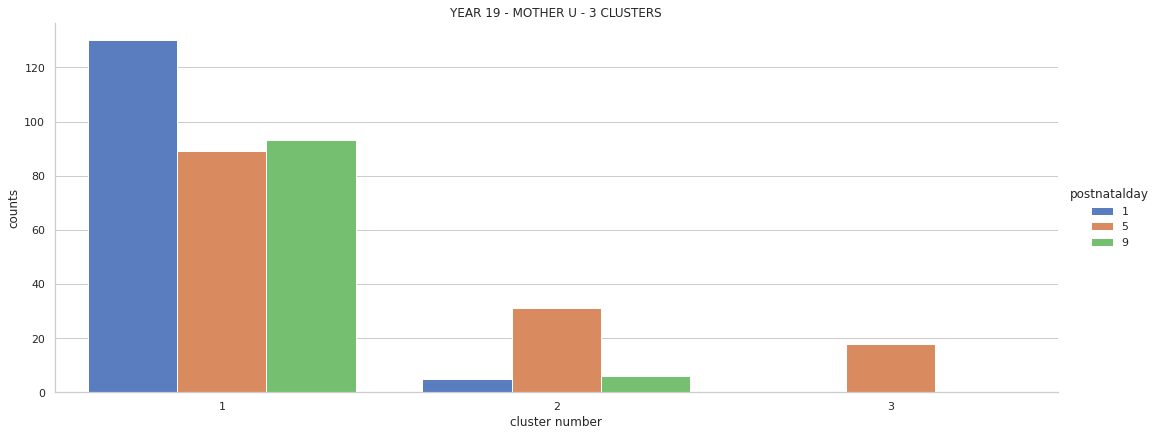

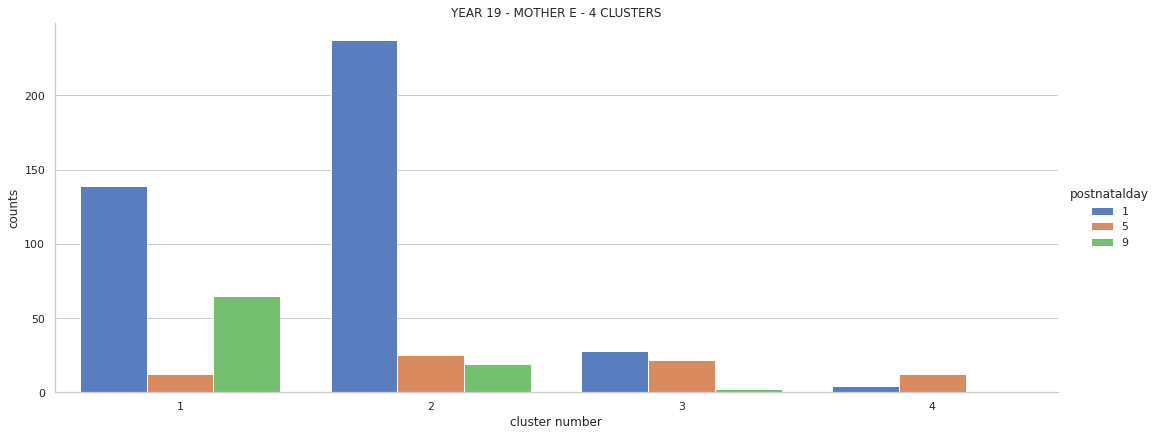

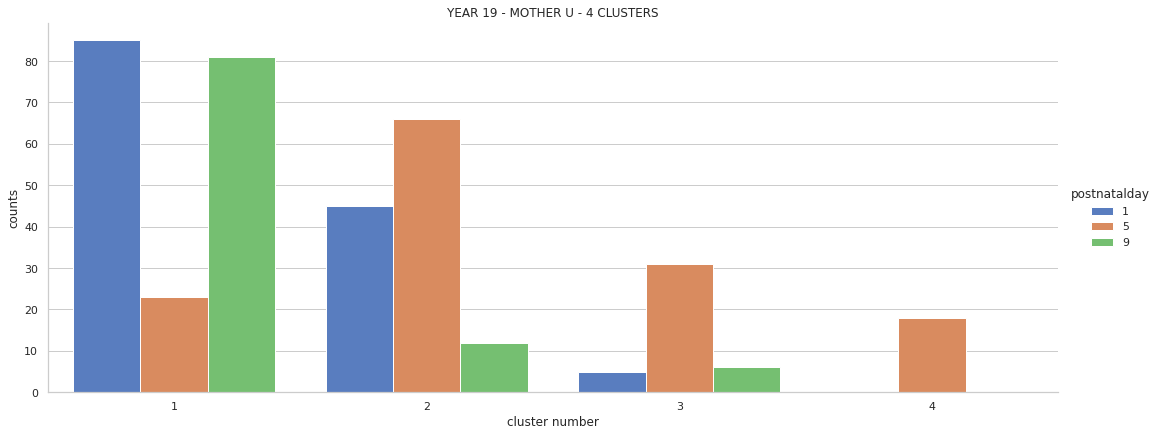

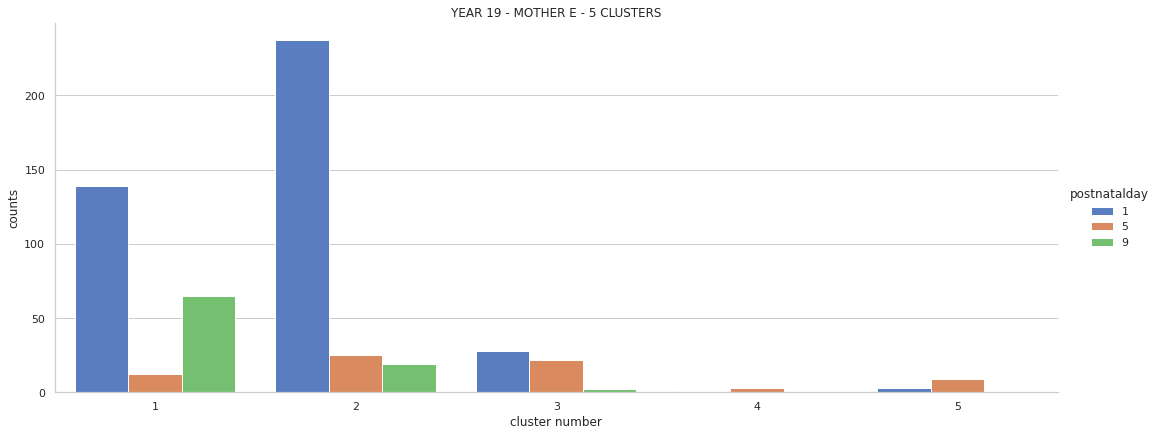

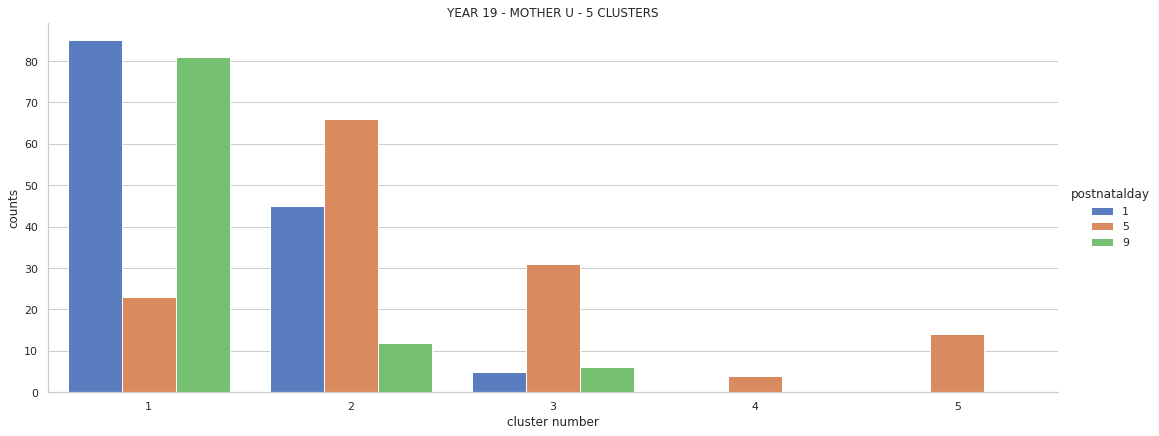

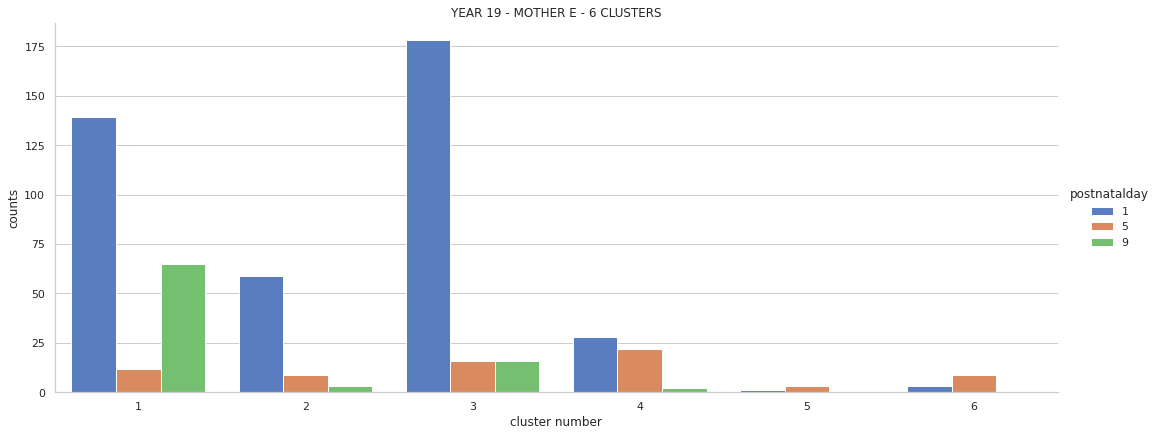

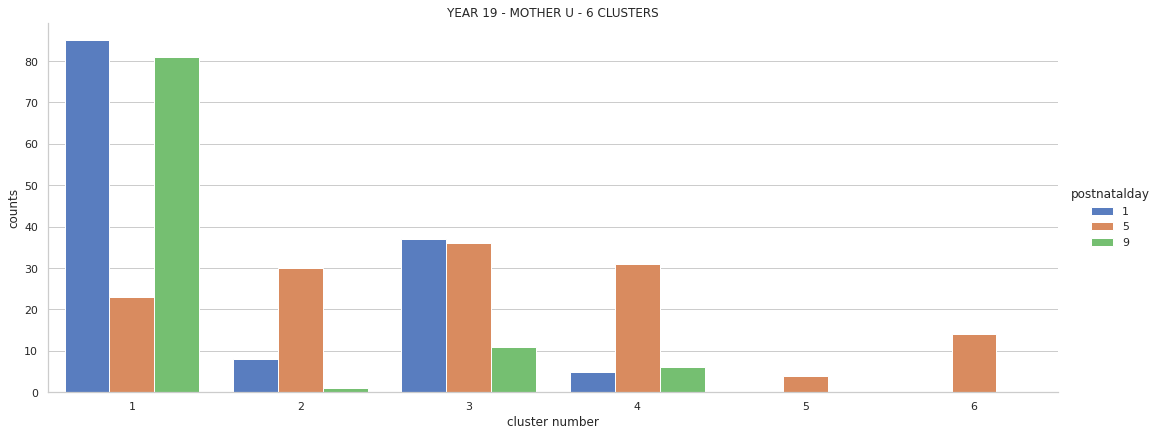

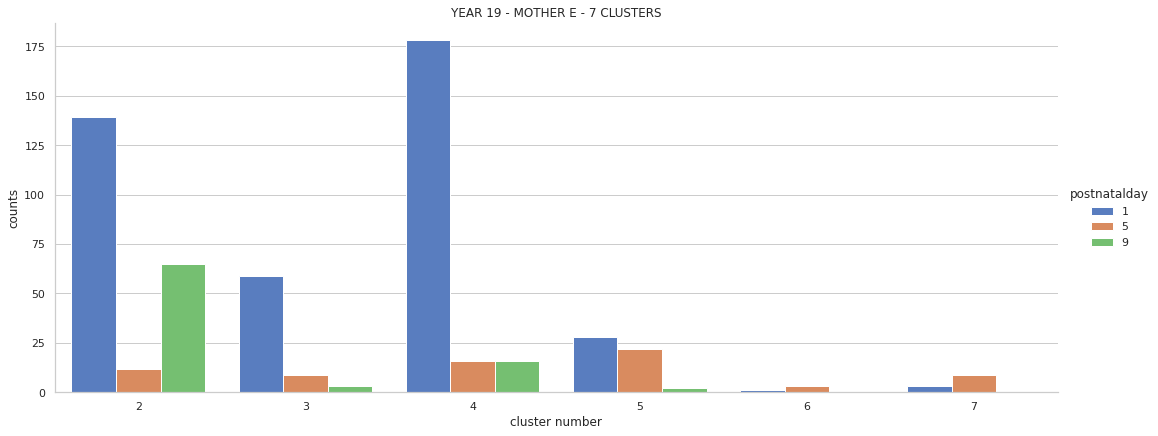

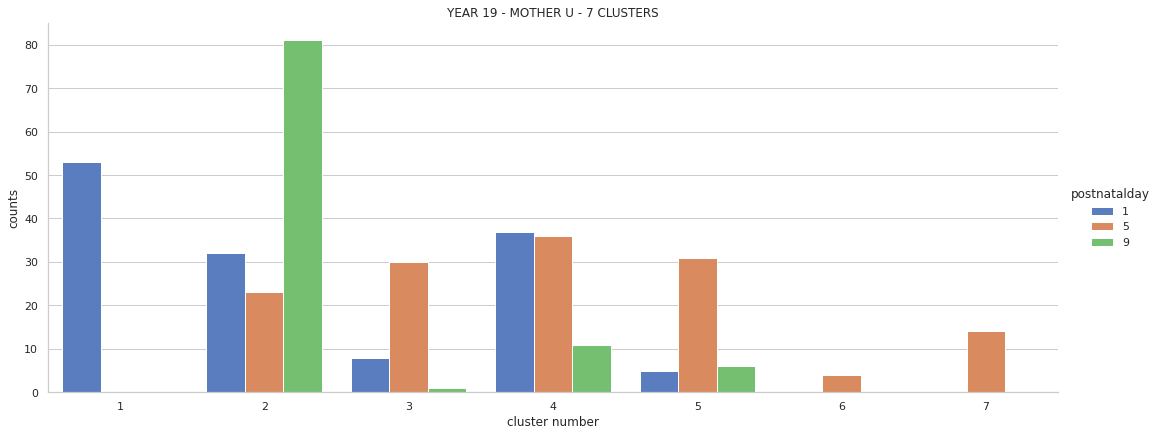

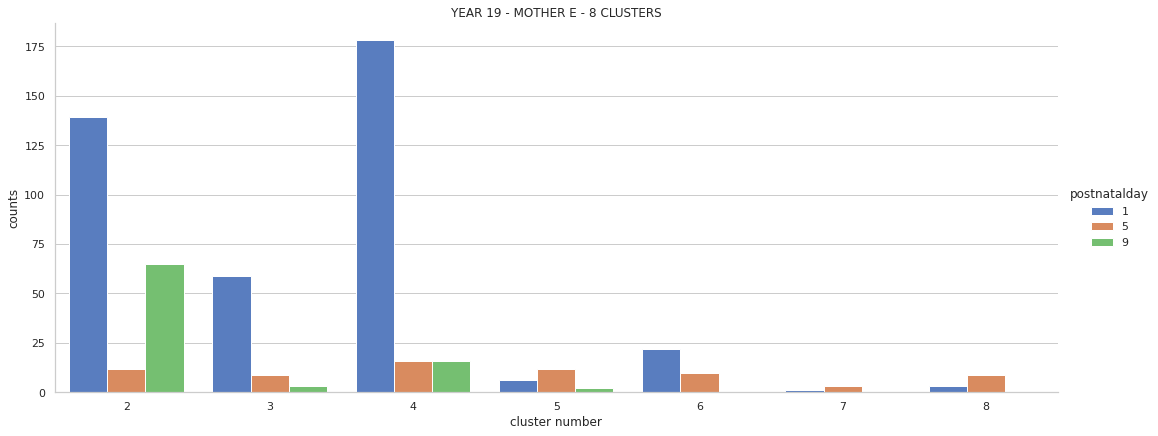

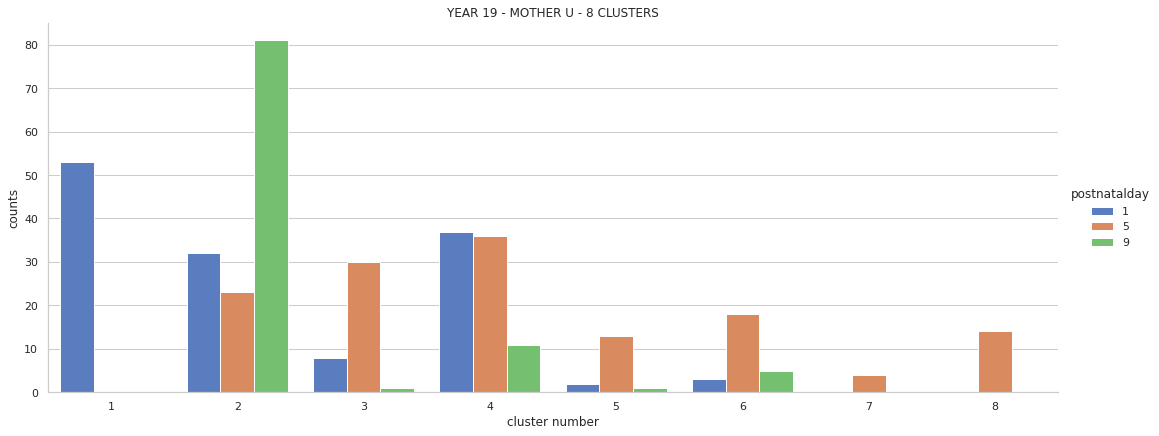

In [177]:
for c in CLUSTERS:
    tmp = df[['mother', 'postnatalday',f"clust{c}", "event"]].groupby(
        ['mother', 'postnatalday', f"clust{c}"]).count().reset_index().rename(
        {'event': 'counts', f"clust{c}": "cluster number"}, axis=1)

    for m in MOTHERS:
        data = tmp[tmp.mother == m]
        g = sns.catplot(x="cluster number", y="counts", hue="postnatalday", data=data,
                    height=6, aspect=2.5, kind="bar", palette="muted")
        g.set_ylabels("counts")
        title = f"YEAR {YEAR} - MOTHER {m} - {c} CLUSTERS"
        plt.title(title)
        plt.savefig(os.path.join(RESULTS_FOLDER, 'counts', f'clust{c}', f'counts-mother:{m}_clust{c}.png'))